In [3]:
!pip install lxml
!pip install bs4
!pip install Nominatim
!pip install geopy
!pip install geocoder
!pip install xlrd

  Stored in directory: /home/jupyterlab/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/d5/66/ed/e7476981dc30210b6b5ce7c25b054e8db35d44fdd2198003d4
Successfully built Nominatim
     |████████████████████████████████| 102kB 25.7MB/s ta 0:00:01


In [4]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
import lxml
import folium # map rendering library

import pandas as pd
import lxml
import xlrd

print("Libraries imported.")

Libraries imported.


In [6]:
df = pd.read_excel('HCM_DISTRICT2.xlsx')

In [7]:
df.head()

,Tỉnh Thành Phố,Mã TP,Quận Huyện,Mã QH,Phường Xã,Mã PX,Cấp,Tên Tiếng Anh
0,Thành phố Hồ Chí Minh,79,Quận 2,769,Phường Thảo Điền,27088,Phường,NaN
1,Thành phố Hồ Chí Minh,79,Quận 2,769,Phường An Phú,27091,Phường,NaN
2,Thành phố Hồ Chí Minh,79,Quận 2,769,Phường Bình An,27094,Phường,NaN
3,Thành phố Hồ Chí Minh,79,Quận 2,769,Phường Bình Trưng Đông,27097,Phường,NaN
4,Thành phố Hồ Chí Minh,79,Quận 2,769,Phường Bình Trưng Đông,27100,Phường,NaN


In [8]:
df['area'] = df['Phường Xã']+', '+df['Quận Huyện']+', Hồ Chí Minh'

df_district2=df[['Phường Xã','Quận Huyện','area']]
df_district2.columns = ['ward','district','area']

In [9]:
df_district2.head(11)

,ward,district,area
0,Phường Thảo Điền,Quận 2,"Phường Thảo Điền, Quận 2, Hồ Chí Minh"
1,Phường An Phú,Quận 2,"Phường An Phú, Quận 2, Hồ Chí Minh"
2,Phường Bình An,Quận 2,"Phường Bình An, Quận 2, Hồ Chí Minh"
3,Phường Bình Trưng Đông,Quận 2,"Phường Bình Trưng Đông, Quận 2, Hồ Chí Minh"
4,Phường Bình Trưng Đông,Quận 2,"Phường Bình Trưng Đông, Quận 2, Hồ Chí Minh"
5,Phường Bình Khánh,Quận 2,"Phường Bình Khánh, Quận 2, Hồ Chí Minh"
6,Phường An Khánh,Quận 2,"Phường An Khánh, Quận 2, Hồ Chí Minh"
7,Phường Cát Lái,Quận 2,"Phường Cát Lái, Quận 2, Hồ Chí Minh"
8,Phường Thạnh Mỹ Lợi,Quận 2,"Phường Thạnh Mỹ Lợi, Quận 2, Hồ Chí Minh"
9,Phường An Lợi Đông,Quận 2,"Phường An Lợi Đông, Quận 2, Hồ Chí Minh"


In [10]:
df_district2.shape

(11, 3)

In [11]:
df_district2.to_csv('VN_HCM_DISTRICT2.csv',index=False)

In [12]:
# define a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Malaysia'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [14]:
coords = [ get_latlng(neighborhood) for neighborhood in df_district2["area"].tolist() ]

In [15]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_district2_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

In [17]:
df_district2_coords.head(11)

,Latitude,Longitude
0,10.81029,106.72968
1,10.80156,106.75369
2,10.79289,106.73087
3,10.78511,106.77805
4,10.78511,106.77805
5,10.78594,106.73445
6,10.78067,106.72050
7,10.76581,106.79225
8,10.77087,106.77040
9,10.77639,106.72770


In [18]:
# merge the coordinates into the original dataframe
df_district2_new =pd.concat([df_district2, df_district2_coords], axis=1)
df_district2_new.head(11)

,ward,district,area,Latitude,Longitude
0,Phường Thảo Điền,Quận 2,"Phường Thảo Điền, Quận 2, Hồ Chí Minh",10.81029,106.72968
1,Phường An Phú,Quận 2,"Phường An Phú, Quận 2, Hồ Chí Minh",10.80156,106.75369
2,Phường Bình An,Quận 2,"Phường Bình An, Quận 2, Hồ Chí Minh",10.79289,106.73087
3,Phường Bình Trưng Đông,Quận 2,"Phường Bình Trưng Đông, Quận 2, Hồ Chí Minh",10.78511,106.77805
4,Phường Bình Trưng Đông,Quận 2,"Phường Bình Trưng Đông, Quận 2, Hồ Chí Minh",10.78511,106.77805
5,Phường Bình Khánh,Quận 2,"Phường Bình Khánh, Quận 2, Hồ Chí Minh",10.78594,106.73445
6,Phường An Khánh,Quận 2,"Phường An Khánh, Quận 2, Hồ Chí Minh",10.78067,106.72050
7,Phường Cát Lái,Quận 2,"Phường Cát Lái, Quận 2, Hồ Chí Minh",10.76581,106.79225
8,Phường Thạnh Mỹ Lợi,Quận 2,"Phường Thạnh Mỹ Lợi, Quận 2, Hồ Chí Minh",10.77087,106.77040
9,Phường An Lợi Đông,Quận 2,"Phường An Lợi Đông, Quận 2, Hồ Chí Minh",10.77639,106.72770


In [19]:
# save the DataFrame as CSV file
df_district2_new.to_csv("VN_HCM_DISTRICT2_LAT_LONG", index=False)

In [25]:
address='Quận 2, Hồ Chí Minh, Việt Nam'
geolocator = Nominatim(user_agent="HoChiMinh")
location = geolocator.geocode(address)
lat_HCM=location.latitude
long_HCM =location.longitude
print('The geograpical coodinate of District 2, Ho Chi Minh are {},{}.'.format(lat_HCM,long_HCM))

The geograpical coodinate of District 2, Ho Chi Minh are 13.9173618,108.0051396.


In [26]:
map_HCM = folium.Map(location=[lat_HCM, long_HCM], zoom_start=14)

# add markers to map
for lat, lng, Neighbourhood in zip(df_district2_new['Latitude'], df_district2_new['Longitude'], df_district2_new['ward']):
    label = '{}'.format(Neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_HCM)  
    
map_HCM

In [27]:
# save the map as HTML file
map_HCM.save('map_HN.html')

In [28]:
CLIENT_ID = '4IWPTPZBLHK1ISW0CQEP0IBTOX3W4OSIRB1DHH3VWM3PYXWU' # your Foursquare ID
CLIENT_SECRET = 'QTGRBGWSK1RJJBEUGSP0YGEE1IIS3EOZKKQY40FWTRZDLNB4' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4IWPTPZBLHK1ISW0CQEP0IBTOX3W4OSIRB1DHH3VWM3PYXWU
CLIENT_SECRET:QTGRBGWSK1RJJBEUGSP0YGEE1IIS3EOZKKQY40FWTRZDLNB4


In [29]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [33]:
HCM_venues=getNearbyVenues(names=df_district2_new['area'],
                               latitudes=df_district2_new['Latitude'],
                               longitudes=df_district2_new['Longitude'],
                              )

Phường Thảo Điền, Quận 2, Hồ Chí Minh
Phường An Phú, Quận 2, Hồ Chí Minh
Phường Bình An, Quận 2, Hồ Chí Minh
Phường Bình Trưng Đông, Quận 2, Hồ Chí Minh
Phường Bình Trưng Đông, Quận 2, Hồ Chí Minh
Phường Bình Khánh, Quận 2, Hồ Chí Minh
Phường An Khánh, Quận 2, Hồ Chí Minh
Phường Cát Lái, Quận 2, Hồ Chí Minh
Phường Thạnh Mỹ Lợi, Quận 2, Hồ Chí Minh
Phường An Lợi Đông, Quận 2, Hồ Chí Minh
Phường Thủ Thiêm, Quận 2, Hồ Chí Minh


In [34]:
HCM_venues.shape

(33, 7)

In [35]:
HCM_venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Phường Thảo Điền, Quận 2, Hồ Chí Minh",10.81029,106.72968,A Cut Above,10.809070,106.731191,Health & Beauty Service
1,"Phường Thảo Điền, Quận 2, Hồ Chí Minh",10.81029,106.72968,Pasta Fresca,10.812714,106.732205,Italian Restaurant
2,"Phường Thảo Điền, Quận 2, Hồ Chí Minh",10.81029,106.72968,Café Evita,10.811645,106.731511,Pizza Place
3,"Phường Thảo Điền, Quận 2, Hồ Chí Minh",10.81029,106.72968,Joymax,10.812291,106.731807,Café
4,"Phường An Phú, Quận 2, Hồ Chí Minh",10.80156,106.75369,Somerset Vista Ho Chi Mihn,10.805777,106.752234,Hotel


In [36]:
HCM_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
"Phường An Lợi Đông, Quận 2, Hồ Chí Minh",4,4,4,4,4,4
"Phường An Phú, Quận 2, Hồ Chí Minh",5,5,5,5,5,5
"Phường Bình An, Quận 2, Hồ Chí Minh",6,6,6,6,6,6
"Phường Bình Khánh, Quận 2, Hồ Chí Minh",4,4,4,4,4,4
"Phường Bình Trưng Đông, Quận 2, Hồ Chí Minh",2,2,2,2,2,2
"Phường Cát Lái, Quận 2, Hồ Chí Minh",2,2,2,2,2,2
"Phường Thạnh Mỹ Lợi, Quận 2, Hồ Chí Minh",3,3,3,3,3,3
"Phường Thảo Điền, Quận 2, Hồ Chí Minh",4,4,4,4,4,4
"Phường Thủ Thiêm, Quận 2, Hồ Chí Minh",3,3,3,3,3,3


In [38]:
print('There are {} uniques categories.'.format(len(HCM_venues['Venue Category'].unique())))

There are 21 uniques categories.


In [39]:
# print out the list of categories
HCM_venues['Venue Category'].unique()[:50]

array(['Health & Beauty Service', 'Italian Restaurant', 'Pizza Place',
       'Café', 'Hotel', 'Vegetarian / Vegan Restaurant', 'Coffee Shop',
       'Indoor Play Area', 'Convenience Store', 'Vietnamese Restaurant',
       'Restaurant', 'Asian Restaurant', 'Flea Market', 'Bookstore',
       'Food', 'Harbor / Marina', 'Beach', 'Pool Hall', 'Juice Bar',
       'Breakfast Spot', 'Tunnel'], dtype=object)

In [40]:
HCM_District2_venues = HCM_venues.groupby('Venue Category').count()

In [41]:
HCM_District2_venues = HCM_District2_venues.reindex(columns=['Neighbourhood'])
HCM_District2_venues = HCM_District2_venues.sort_values(by=['Neighbourhood'], ascending=False).head(20)
HCM_District2_venues.to_csv('HCM_District2_venues.csv')

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
HCM_venues_bar = pd.read_csv('HCM_District2_venues.csv')

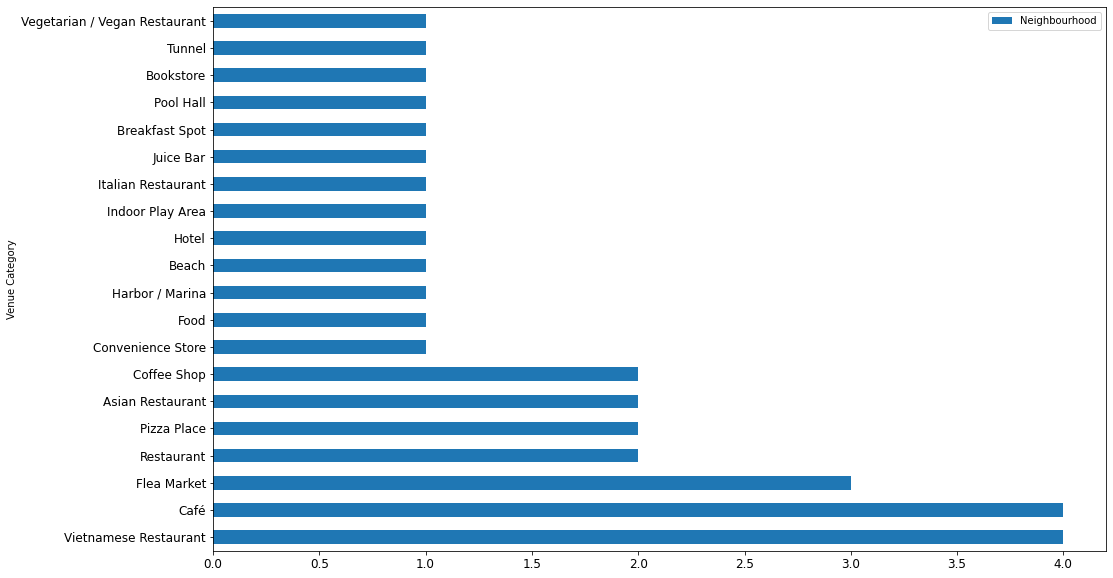

In [44]:
HCM_venues_bar.plot.barh(x='Venue Category',fontsize = 12, figsize=(16, 10),stacked=True);

In [46]:
# one hot encoding
hcm_onehot = pd.get_dummies(HCM_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
hcm_onehot['Neighbourhood'] = HCM_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [hcm_onehot.columns[-1]] + list(hcm_onehot.columns[:-1])
hcm_onehot.head()

,Asian Restaurant,Beach,Bookstore,Breakfast Spot,Café,Coffee Shop,Convenience Store,Flea Market,Food,Harbor / Marina,Health & Beauty Service,Hotel,Indoor Play Area,Italian Restaurant,Juice Bar,Pizza Place,Pool Hall,Restaurant,Tunnel,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Neighbourhood
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,"Phường Thảo Điền, Quận 2, Hồ Chí Minh"
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,"Phường Thảo Điền, Quận 2, Hồ Chí Minh"
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,"Phường Thảo Điền, Quận 2, Hồ Chí Minh"
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Phường Thảo Điền, Quận 2, Hồ Chí Minh"
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,"Phường An Phú, Quận 2, Hồ Chí Minh"


In [47]:
HCM_grouped=hcm_onehot.groupby('Neighbourhood').mean().reset_index()
HCM_grouped

,Neighbourhood,Asian Restaurant,Beach,Bookstore,Breakfast Spot,Café,Coffee Shop,Convenience Store,Flea Market,Food,Harbor / Marina,Health & Beauty Service,Hotel,Indoor Play Area,Italian Restaurant,Juice Bar,Pizza Place,Pool Hall,Restaurant,Tunnel,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,"Phường An Lợi Đông, Quận 2, Hồ Chí Minh",0.000000,0.25,0.00,0.000000,0.250000,0.000000,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.25,0.000000,0.25,0.000000,0.000000,0.0,0.00
1,"Phường An Phú, Quận 2, Hồ Chí Minh",0.000000,0.00,0.00,0.000000,0.000000,0.200000,0.2,0.00,0.00,0.0,0.00,0.2,0.2,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.2,0.00
2,"Phường Bình An, Quận 2, Hồ Chí Minh",0.166667,0.00,0.00,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.166667,0.00,0.166667,0.000000,0.0,0.50
3,"Phường Bình Khánh, Quận 2, Hồ Chí Minh",0.000000,0.00,0.25,0.000000,0.000000,0.000000,0.0,0.25,0.25,0.0,0.00,0.0,0.0,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.0,0.25
4,"Phường Bình Trưng Đông, Quận 2, Hồ Chí Minh",0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.0,1.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.0,0.00
5,"Phường Cát Lái, Quận 2, Hồ Chí Minh",0.000000,0.00,0.00,0.000000,0.500000,0.000000,0.0,0.00,0.00,0.5,0.00,0.0,0.0,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.0,0.00
6,"Phường Thạnh Mỹ Lợi, Quận 2, Hồ Chí Minh",0.333333,0.00,0.00,0.000000,0.333333,0.000000,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.000000,0.00,0.333333,0.000000,0.0,0.00
7,"Phường Thảo Điền, Quận 2, Hồ Chí Minh",0.000000,0.00,0.00,0.000000,0.250000,0.000000,0.0,0.00,0.00,0.0,0.25,0.0,0.0,0.25,0.00,0.250000,0.00,0.000000,0.000000,0.0,0.00
8,"Phường Thủ Thiêm, Quận 2, Hồ Chí Minh",0.000000,0.00,0.00,0.333333,0.000000,0.333333,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.000000,0.00,0.000000,0.333333,0.0,0.00


In [48]:
num_top_venues = 5


for hood in HCM_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = HCM_grouped[HCM_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Phường An Lợi Đông, Quận 2, Hồ Chí Minh----
              venue  freq
0              Café  0.25
1         Pool Hall  0.25
2         Juice Bar  0.25
3             Beach  0.25
4  Asian Restaurant  0.00


----Phường An Phú, Quận 2, Hồ Chí Minh----
                           venue  freq
0               Indoor Play Area   0.2
1  Vegetarian / Vegan Restaurant   0.2
2                    Coffee Shop   0.2
3              Convenience Store   0.2
4                          Hotel   0.2


----Phường Bình An, Quận 2, Hồ Chí Minh----
                   venue  freq
0  Vietnamese Restaurant  0.50
1            Pizza Place  0.17
2             Restaurant  0.17
3       Asian Restaurant  0.17
4                   Café  0.00


----Phường Bình Khánh, Quận 2, Hồ Chí Minh----
                   venue  freq
0  Vietnamese Restaurant  0.25
1              Bookstore  0.25
2            Flea Market  0.25
3                   Food  0.25
4       Indoor Play Area  0.00


----Phường Bình Trưng Đông, Quận 2, Hồ Chí Minh-

In [49]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [50]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = HCM_grouped['Neighbourhood']

for ind in np.arange(HCM_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(HCM_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Phường An Lợi Đông, Quận 2, Hồ Chí Minh",Beach,Pool Hall,Juice Bar,Café,Vietnamese Restaurant,Food,Bookstore,Breakfast Spot,Coffee Shop,Convenience Store
1,"Phường An Phú, Quận 2, Hồ Chí Minh",Coffee Shop,Convenience Store,Indoor Play Area,Hotel,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Food,Beach,Bookstore,Breakfast Spot
2,"Phường Bình An, Quận 2, Hồ Chí Minh",Vietnamese Restaurant,Restaurant,Pizza Place,Asian Restaurant,Pool Hall,Flea Market,Beach,Bookstore,Breakfast Spot,Café
3,"Phường Bình Khánh, Quận 2, Hồ Chí Minh",Vietnamese Restaurant,Bookstore,Flea Market,Food,Harbor / Marina,Beach,Breakfast Spot,Café,Coffee Shop,Convenience Store
4,"Phường Bình Trưng Đông, Quận 2, Hồ Chí Minh",Flea Market,Vietnamese Restaurant,Harbor / Marina,Beach,Bookstore,Breakfast Spot,Café,Coffee Shop,Convenience Store,Food


In [51]:
# set number of clusters
kclusters = 5

hcm_grouped_clustering = HCM_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(hcm_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_ 
# to change use .astype()

array([1, 3, 4, 4, 2, 0, 1, 1, 3], dtype=int32)

In [52]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster_Labels', kmeans.labels_)
neighbourhoods_venues_sorted.head()

,Cluster_Labels,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,"Phường An Lợi Đông, Quận 2, Hồ Chí Minh",Beach,Pool Hall,Juice Bar,Café,Vietnamese Restaurant,Food,Bookstore,Breakfast Spot,Coffee Shop,Convenience Store
1,3,"Phường An Phú, Quận 2, Hồ Chí Minh",Coffee Shop,Convenience Store,Indoor Play Area,Hotel,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Food,Beach,Bookstore,Breakfast Spot
2,4,"Phường Bình An, Quận 2, Hồ Chí Minh",Vietnamese Restaurant,Restaurant,Pizza Place,Asian Restaurant,Pool Hall,Flea Market,Beach,Bookstore,Breakfast Spot,Café
3,4,"Phường Bình Khánh, Quận 2, Hồ Chí Minh",Vietnamese Restaurant,Bookstore,Flea Market,Food,Harbor / Marina,Beach,Breakfast Spot,Café,Coffee Shop,Convenience Store
4,2,"Phường Bình Trưng Đông, Quận 2, Hồ Chí Minh",Flea Market,Vietnamese Restaurant,Harbor / Marina,Beach,Bookstore,Breakfast Spot,Café,Coffee Shop,Convenience Store,Food


In [53]:
HCM_merged = df_district2_new

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
HCM_merged = HCM_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='area')

HCM_merged.head() # check the last columns!

,ward,district,area,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Phường Thảo Điền,Quận 2,"Phường Thảo Điền, Quận 2, Hồ Chí Minh",10.81029,106.72968,1.0,Health & Beauty Service,Pizza Place,Café,Italian Restaurant,Food,Beach,Bookstore,Breakfast Spot,Coffee Shop,Convenience Store
1,Phường An Phú,Quận 2,"Phường An Phú, Quận 2, Hồ Chí Minh",10.80156,106.75369,3.0,Coffee Shop,Convenience Store,Indoor Play Area,Hotel,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Food,Beach,Bookstore,Breakfast Spot
2,Phường Bình An,Quận 2,"Phường Bình An, Quận 2, Hồ Chí Minh",10.79289,106.73087,4.0,Vietnamese Restaurant,Restaurant,Pizza Place,Asian Restaurant,Pool Hall,Flea Market,Beach,Bookstore,Breakfast Spot,Café
3,Phường Bình Trưng Đông,Quận 2,"Phường Bình Trưng Đông, Quận 2, Hồ Chí Minh",10.78511,106.77805,2.0,Flea Market,Vietnamese Restaurant,Harbor / Marina,Beach,Bookstore,Breakfast Spot,Café,Coffee Shop,Convenience Store,Food
4,Phường Bình Trưng Đông,Quận 2,"Phường Bình Trưng Đông, Quận 2, Hồ Chí Minh",10.78511,106.77805,2.0,Flea Market,Vietnamese Restaurant,Harbor / Marina,Beach,Bookstore,Breakfast Spot,Café,Coffee Shop,Convenience Store,Food


In [54]:
HCM_merged=HCM_merged.dropna()

In [56]:
HCM_merged['Cluster_Labels'] = HCM_merged.Cluster_Labels.astype(int)
HCM_merged.head(11)

,ward,district,area,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Phường Thảo Điền,Quận 2,"Phường Thảo Điền, Quận 2, Hồ Chí Minh",10.81029,106.72968,1,Health & Beauty Service,Pizza Place,Café,Italian Restaurant,Food,Beach,Bookstore,Breakfast Spot,Coffee Shop,Convenience Store
1,Phường An Phú,Quận 2,"Phường An Phú, Quận 2, Hồ Chí Minh",10.80156,106.75369,3,Coffee Shop,Convenience Store,Indoor Play Area,Hotel,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Food,Beach,Bookstore,Breakfast Spot
2,Phường Bình An,Quận 2,"Phường Bình An, Quận 2, Hồ Chí Minh",10.79289,106.73087,4,Vietnamese Restaurant,Restaurant,Pizza Place,Asian Restaurant,Pool Hall,Flea Market,Beach,Bookstore,Breakfast Spot,Café
3,Phường Bình Trưng Đông,Quận 2,"Phường Bình Trưng Đông, Quận 2, Hồ Chí Minh",10.78511,106.77805,2,Flea Market,Vietnamese Restaurant,Harbor / Marina,Beach,Bookstore,Breakfast Spot,Café,Coffee Shop,Convenience Store,Food
4,Phường Bình Trưng Đông,Quận 2,"Phường Bình Trưng Đông, Quận 2, Hồ Chí Minh",10.78511,106.77805,2,Flea Market,Vietnamese Restaurant,Harbor / Marina,Beach,Bookstore,Breakfast Spot,Café,Coffee Shop,Convenience Store,Food
5,Phường Bình Khánh,Quận 2,"Phường Bình Khánh, Quận 2, Hồ Chí Minh",10.78594,106.73445,4,Vietnamese Restaurant,Bookstore,Flea Market,Food,Harbor / Marina,Beach,Breakfast Spot,Café,Coffee Shop,Convenience Store
7,Phường Cát Lái,Quận 2,"Phường Cát Lái, Quận 2, Hồ Chí Minh",10.76581,106.79225,0,Harbor / Marina,Café,Vietnamese Restaurant,Beach,Bookstore,Breakfast Spot,Coffee Shop,Convenience Store,Flea Market,Food
8,Phường Thạnh Mỹ Lợi,Quận 2,"Phường Thạnh Mỹ Lợi, Quận 2, Hồ Chí Minh",10.77087,106.77040,1,Asian Restaurant,Restaurant,Café,Harbor / Marina,Beach,Bookstore,Breakfast Spot,Coffee Shop,Convenience Store,Flea Market
9,Phường An Lợi Đông,Quận 2,"Phường An Lợi Đông, Quận 2, Hồ Chí Minh",10.77639,106.72770,1,Beach,Pool Hall,Juice Bar,Café,Vietnamese Restaurant,Food,Bookstore,Breakfast Spot,Coffee Shop,Convenience Store
10,Phường Thủ Thiêm,Quận 2,"Phường Thủ Thiêm, Quận 2, Hồ Chí Minh",10.77238,106.70994,3,Tunnel,Breakfast Spot,Coffee Shop,Vietnamese Restaurant,Harbor / Marina,Beach,Bookstore,Café,Convenience Store,Flea Market


In [58]:
# create map
map_clusters = folium.Map(location=[lat_HCM, long_HCM], zoom_start=14)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(HCM_merged['Latitude'], HCM_merged['Longitude'], HCM_merged['area'], HCM_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [59]:
# save the map as HTML file
map_clusters.save('map_clusters.html')